## Modeling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
%matplotlib inline

In [2]:
fifa_prediction = pd.read_pickle('fifa_predict_position')
fifa_player_analysis = pd.read_pickle('fifa_player_analysis')

Since we do not need the id anymore, we drop the unnecssary columns.

In [3]:
fifa = fifa_prediction.drop(columns=['ID', 'Preferred Positions'])
fifa['Preferred Positions'] = fifa_player_analysis['Preferred Positions']
fifa.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63.0,85.0,81.0,91.0,94.0,76.0,88.0,92.0,85.0,94.0,...,89.0,96.0,92.0,63.0,93.0,95.0,95.0,91.0,95.0,ST LW
1,48.0,77.0,89.0,97.0,95.0,90.0,71.0,88.0,74.0,85.0,...,90.0,95.0,73.0,95.0,95.0,96.0,68.0,87.0,93.0,RW
2,56.0,75.0,81.0,96.0,89.0,84.0,62.0,77.0,81.0,80.0,...,96.0,88.0,78.0,82.0,95.0,92.0,61.0,90.0,90.0,LW
3,78.0,77.0,86.0,86.0,94.0,84.0,77.0,86.0,85.0,87.0,...,86.0,93.0,89.0,60.0,91.0,83.0,69.0,77.0,92.0,ST
5,80.0,62.0,77.0,85.0,91.0,84.0,85.0,83.0,81.0,88.0,...,78.0,91.0,79.0,80.0,89.0,87.0,84.0,83.0,91.0,ST


In [4]:
p = fifa['Preferred Positions'].str.split().apply(lambda x: x[0]).unique()
p


array(['ST', 'RW', 'LW', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM', 'RB',
       'CF', 'RWB', 'LWB'], dtype=object)

In [5]:

fifa_new = fifa.copy()
fifa_new.drop(fifa_new.index, inplace=True)

#gets multiple position that the player has
for i in p:
    temp = fifa[fifa['Preferred Positions'].str.contains(i)]
    temp['Preferred Positions'] = i
    fifa_new = fifa_new.append(temp, ignore_index=True)
    
fifa_new.iloc[::2000, :]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63.0,85.0,81.0,91.0,94.0,76.0,88.0,92.0,85.0,94.0,...,89.0,96.0,92.0,63.0,93.0,95.0,95.0,91.0,95.0,ST
2000,49.0,61.0,62.0,65.0,60.0,63.0,34.0,66.0,62.0,68.0,...,91.0,58.0,63.0,91.0,66.0,57.0,61.0,80.0,56.0,ST
4000,60.0,44.0,36.0,59.0,60.0,39.0,67.0,40.0,40.0,54.0,...,63.0,56.0,69.0,61.0,56.0,55.0,78.0,67.0,61.0,RW
6000,26.0,19.0,12.0,12.0,14.0,20.0,24.0,18.0,23.0,24.0,...,69.0,72.0,41.0,69.0,23.0,50.0,85.0,57.0,12.0,CDM
8000,84.0,51.0,44.0,61.0,30.0,39.0,69.0,65.0,47.0,79.0,...,51.0,77.0,79.0,44.0,58.0,73.0,70.0,67.0,55.0,CB
10000,69.0,25.0,38.0,35.0,32.0,37.0,66.0,43.0,37.0,50.0,...,49.0,62.0,68.0,34.0,44.0,63.0,68.0,33.0,43.0,CB
12000,69.0,73.0,72.0,74.0,57.0,52.0,46.0,60.0,48.0,64.0,...,78.0,69.0,85.0,75.0,69.0,70.0,70.0,84.0,74.0,RM
14000,62.0,71.0,54.0,72.0,81.0,55.0,73.0,72.0,70.0,80.0,...,72.0,77.0,75.0,68.0,82.0,77.0,73.0,77.0,80.0,CM
16000,85.0,48.0,46.0,58.0,65.0,34.0,59.0,61.0,47.0,74.0,...,34.0,68.0,83.0,43.0,52.0,66.0,51.0,54.0,63.0,CM
18000,50.0,56.0,69.0,69.0,75.0,67.0,66.0,66.0,76.0,74.0,...,90.0,73.0,70.0,77.0,74.0,76.0,77.0,81.0,68.0,LM


As we looked at our previous heat map graph before in EDA section, we noticed that the pattern is pretty obvious for the each position. But there might be a outlier. Let's fit the data

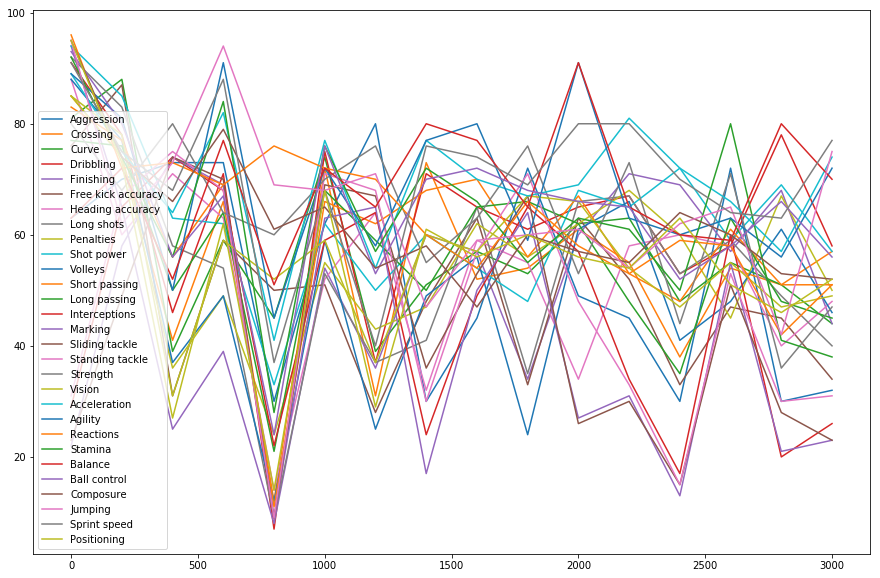

In [6]:

fifa_st = fifa_new[fifa_new['Preferred Positions'] == 'ST'].iloc[::200,:-1]
fifa_st = fifa_st.astype(float)
fifa_st.plot( figsize = (15,10))

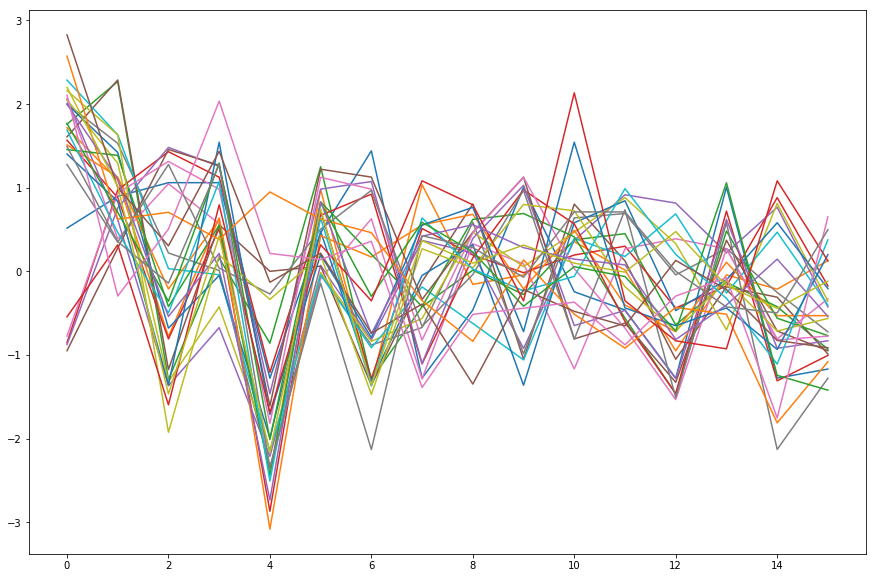

In [7]:


scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(fifa_st)
fifa_new_st = pd.DataFrame(scaled)

fifa_new_st.plot( figsize = (15,10), legend= False)


## Machine Learning
Great! Now let's normalize whole data.
Then we have to classify target variables, and we can divide them into two big categories, Attack and defense.
Midfielders may have both attributes, but I tried my best to classify their role according to the soccer knowledge.

In [8]:
new_cols = [
    'Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 
    'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 'Short passing', 
    'Long passing', 'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
    'Strength', 'Vision', 'Acceleration', 'Agility', 'Reactions', 'Stamina', 'Balance', 
    'Ball control','Composure','Jumping', 'Sprint speed', 'Positioning',
]

fifa_scaled = scaler.fit_transform(fifa_new.iloc[:,:-1])
fifa_norm = pd.DataFrame(fifa_scaled)
fifa_norm.columns = new_cols
#fifa_norm = (fifa_new.iloc[:,:-1] - fifa_new.iloc[:,:-1].mean()) - (fifa_new.iloc[:,:-1].max() - fifa_new.iloc[:,:-1].min())
position = {'ST': 1, 'RW': 1, 'LW': 1, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 1,
           'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}

fifa_norm['Preferred Position'] = fifa_new['Preferred Positions']
fifa_norm = fifa_norm.replace({'Preferred Position' : position})

fifa_norm.iloc[::2000,]

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Position
0,0.356360,1.853441,1.764019,1.856305,2.461010,1.799733,2.023439,2.275395,2.243422,2.166703,...,1.703963,3.787005,1.776497,-0.081071,2.055536,2.855263,2.495172,1.776646,2.295413,1
2000,-0.452952,0.548644,0.734995,0.471479,0.708003,1.064320,-1.119067,0.918988,0.779027,0.653497,...,1.840267,-0.554282,-0.074765,1.914707,0.408476,-0.157522,-0.358148,1.012408,0.277779,1
4000,0.182936,-0.375587,-0.673143,0.151904,0.708003,-0.293365,0.801353,-0.437419,-0.621699,-0.161307,...,-0.067990,-0.782771,0.308255,-0.223627,-0.201546,-0.316090,1.068512,0.109218,0.536450,1
6000,-1.782537,-1.734751,-1.972963,-2.351436,-1.663713,-1.368200,-1.701012,-1.585147,-1.704078,-1.907314,...,0.340922,1.045140,-1.479170,0.346596,-2.214618,-0.712509,1.655961,-0.585544,-1.998527,0
8000,1.570328,0.004979,-0.239870,0.258429,-0.838768,-0.293365,0.917742,0.866819,-0.176013,1.293699,...,-0.885814,1.616362,0.946621,-1.435350,-0.079541,1.111019,0.397143,0.109218,0.226044,0
10000,0.703208,-1.408551,-0.564825,-1.126397,-0.735650,-0.406506,0.743159,-0.280910,-0.812707,-0.394108,...,-1.022118,-0.097304,0.244418,-2.148128,-0.933572,0.318180,0.229301,-2.252972,-0.394766,0
12000,0.703208,1.201042,1.276587,0.950842,0.553326,0.442048,-0.420732,0.605971,-0.112344,0.420696,...,0.954290,0.702406,1.329641,0.774262,0.591483,0.873167,0.397143,1.290313,1.208995,1
14000,0.298552,1.092309,0.301722,0.844317,1.790743,0.611758,1.150521,1.232005,1.288382,1.351900,...,0.545378,1.616362,0.691275,0.275318,1.384511,1.428154,0.648907,0.803980,1.519400,1
16000,1.628136,-0.158121,-0.131551,0.098641,0.965798,-0.576216,0.335797,0.658141,-0.176013,1.002698,...,-2.044399,0.588162,1.201968,-1.506627,-0.445555,0.556032,-1.197359,-0.793972,0.639918,1
18000,-0.395144,0.276811,1.114109,0.684529,1.481389,1.290601,0.743159,0.918988,1.670398,1.002698,...,1.772115,1.159384,0.372091,0.916818,0.896494,1.348870,0.984591,1.081885,0.898589,1


In [9]:
X = fifa_norm.drop('Preferred Position', axis=1)
y = fifa_norm['Preferred Position']

X_train, X_test, y_train, y_test = train_test_split(X,y)
print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('y train shape: {}'.format(y_train.shape))
print('y test shape: {}'.format(y_test.shape))


X train shape: (20196, 29)
X test shape: (6733, 29)
y train shape: (20196,)
y test shape: (6733,)


I tried using KNeighbors Classifier, but unfortunately, it did not work right with at most 60% accuracy

In [10]:
knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

knn.score(X_test, y_test)

0.5980989157879103

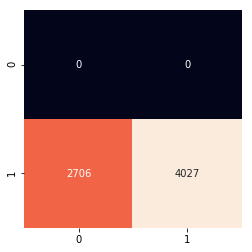

In [11]:
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

let's use logistic regression for the machine learning

In [12]:
X = fifa_norm.iloc[:,:-1]
y = fifa_norm.iloc[:,-1]

#X_train, X_test, y_train, y_test = train_test_split(X,y)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

log = LogisticRegression()

log_cv = GridSearchCV(log, param_grid, cv=50)

log_cv.fit(X_train, y_train)


log_cv.best_score_



0.6082887700534759